## Titanic Veri Seti ile Denetimli Öğrenme Projesi


1.Veri Yükleme

In [26]:
import pandas as pd

df = pd.read_csv("/Users/emirhanozcan/Desktop/veri bilimi ödev/PHYTON İLE VERİ BİLİMİ NİSAN 2.HAFTA ÖDEVİ/titanic.csv")
print(df.head())
print(df.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

2.Eksik Veriler Hakkında Bilgi Alma

In [27]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


*Verimizde 177 adet Age,687 adet Cabin,2 adet Embarked eksikliği fark edildi.

3.Veriyi Temizleyin ve Hazırlayın

In [28]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
#Gerekli Sütunları Seçme İşlemi

df['Age'].fillna(df['Age'].mean(),inplace=True)
#Age : ortalama ile doldurma ->mean() kütüphanesi ile gerçekleşir.

df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
#Embarked : en sık değer ile doldurma ->mode() kütüphanesi ile gerçekleşir.

#.fillna(...) -> Eksik (NaN) değerleri doldurmak için kullanılır.

/var/folders/4h/mxfj5hjn0_97gq5p66v07b940000gn/T/ipykernel_29944/2256191020.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
/var/folders/4h/mxfj5hjn0_97gq5p66v07b940000gn/T/ipykernel_29944/2256191020.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

NOT: Cabin sütununu doldurmadık sebebi aşırı eksik veri girişi olduğundan dolayıdır.

4.Kategorik Değişkenleri Sayısallaştırma

In [29]:
from sklearn.preprocessing import LabelEncoder

df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])


5.Veriyi Eğitim-Test Setlerine Ayırma

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


6.Model Seçin ve Eğitin


In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

7.Modeli Değerlendirin

In [32]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8100558659217877
F1 Score: 0.7605633802816901
Confusion Matrix:
 [[91 14]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



8.Embarked sütununda limanlardan binen yolcu sayısı grafiği gösterimi

/var/folders/4h/mxfj5hjn0_97gq5p66v07b940000gn/T/ipykernel_29944/596079912.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Embarked', palette='pastel')


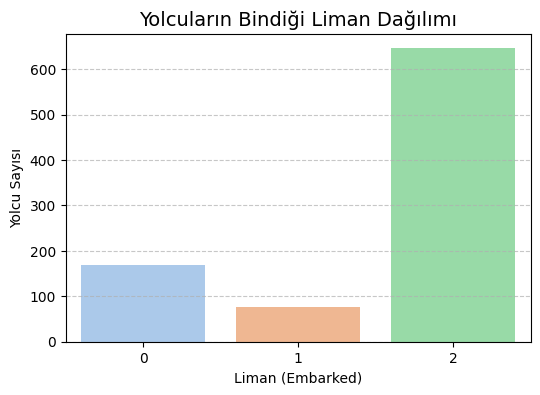

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Embarked', palette='pastel')

plt.title('Yolcuların Bindiği Liman Dağılımı', fontsize=14)
plt.xlabel('Liman (Embarked)')
plt.ylabel('Yolcu Sayısı')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


9.Isı Haritası(HeatMap) 

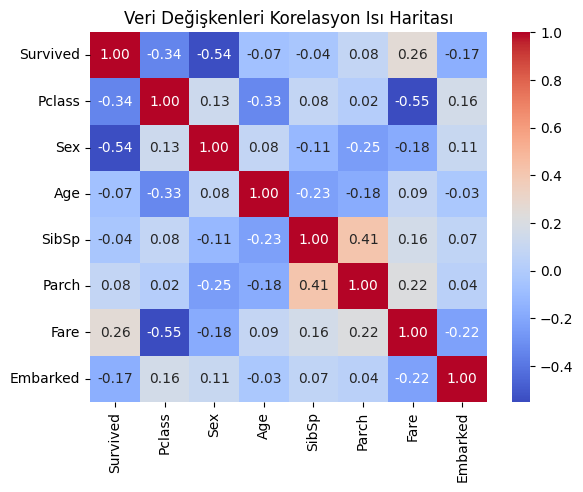

In [34]:
corr = df.corr()  
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Veri Değişkenleri Korelasyon Isı Haritası')
plt.show()
